# Assignment 1

### Question 0: Data Preparation

In [125]:
! pip install pyreadstat

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("data.csv", sep=';')
df.tail()
df.head()

,Review_ID,Number_Words_Review,ZNumber_Words_Review,Prod_Desig,Prod_Design_positive,Prod_Design_negative,Prod_Technical,Prod_Technical_positive,Prod_Technical_negative,Prod_Price,...,Serv_Delivery_positive,Serv_Delivery_negative,Category,Country,Gender,Age,Sentiment,Rating_Score,Purchase,Number_of_Purchases
0,1,34,"-0,178828858",1,1,0,1,1,0,0,...,0,0,0,1,0,"24,56327497",4,5,1,1
1,2,32,"-0,225796385",1,1,0,1,1,0,1,...,0,0,0,1,0,"38,27120469",5,4,0,0
2,3,54,"0,290846409",1,0,1,1,0,1,1,...,0,1,0,1,0,"46,77239881",2,2,0,0
3,4,20,"-0,507601545",1,1,0,1,1,0,0,...,0,0,0,1,0,"31,66539161",5,5,1,2
4,5,12,"-0,695471652",1,1,0,1,1,0,0,...,0,0,0,1,0,"25,31939178",3,5,0,0


### Convert 'object' columns to 'float'

In [ ]:
df['ZNumber_Words_Review'] = df['ZNumber_Words_Review'].astype(str).str.replace(',', '.').astype(float)
df['Age'] = df['Age'].astype(str).str.replace(',', '.').astype(float)
# Check if the conversion was successful
df[['ZNumber_Words_Review', 'Age']].info(), df[['ZNumber_Words_Review', 'Age']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZNumber_Words_Review  600 non-null    float64
 1   Age                   600 non-null    float64
dtypes: float64(2)
memory usage: 9.5 KB


(None,
    ZNumber_Words_Review        Age
 0             -0.178829  24.563275
 1             -0.225796  38.271205
 2              0.290846  46.772399
 3             -0.507602  31.665392
 4             -0.695472  25.319392)

### Fix 'Category' column

In [ ]:
category_dummies = pd.get_dummies(df['Category'], prefix='Category')
category_dummies = category_dummies.astype(int)
df = df.drop('Category', axis=1)
df = df.join(category_dummies)
df.head()

,Review_ID,Number_Words_Review,ZNumber_Words_Review,Prod_Desig,Prod_Design_positive,Prod_Design_negative,Prod_Technical,Prod_Technical_positive,Prod_Technical_negative,Prod_Price,...,Country,Gender,Age,Sentiment,Rating_Score,Purchase,Number_of_Purchases,Category_0,Category_1,Category_2
0,1,34,-0.178829,1,1,0,1,1,0,0,...,1,0,24.563275,4,5,1,1,1,0,0
1,2,32,-0.225796,1,1,0,1,1,0,1,...,1,0,38.271205,5,4,0,0,1,0,0
2,3,54,0.290846,1,0,1,1,0,1,1,...,1,0,46.772399,2,2,0,0,1,0,0
3,4,20,-0.507602,1,1,0,1,1,0,0,...,1,0,31.665392,5,5,1,2,1,0,0
4,5,12,-0.695472,1,1,0,1,1,0,0,...,1,0,25.319392,3,5,0,0,1,0,0


### Checking the correlation

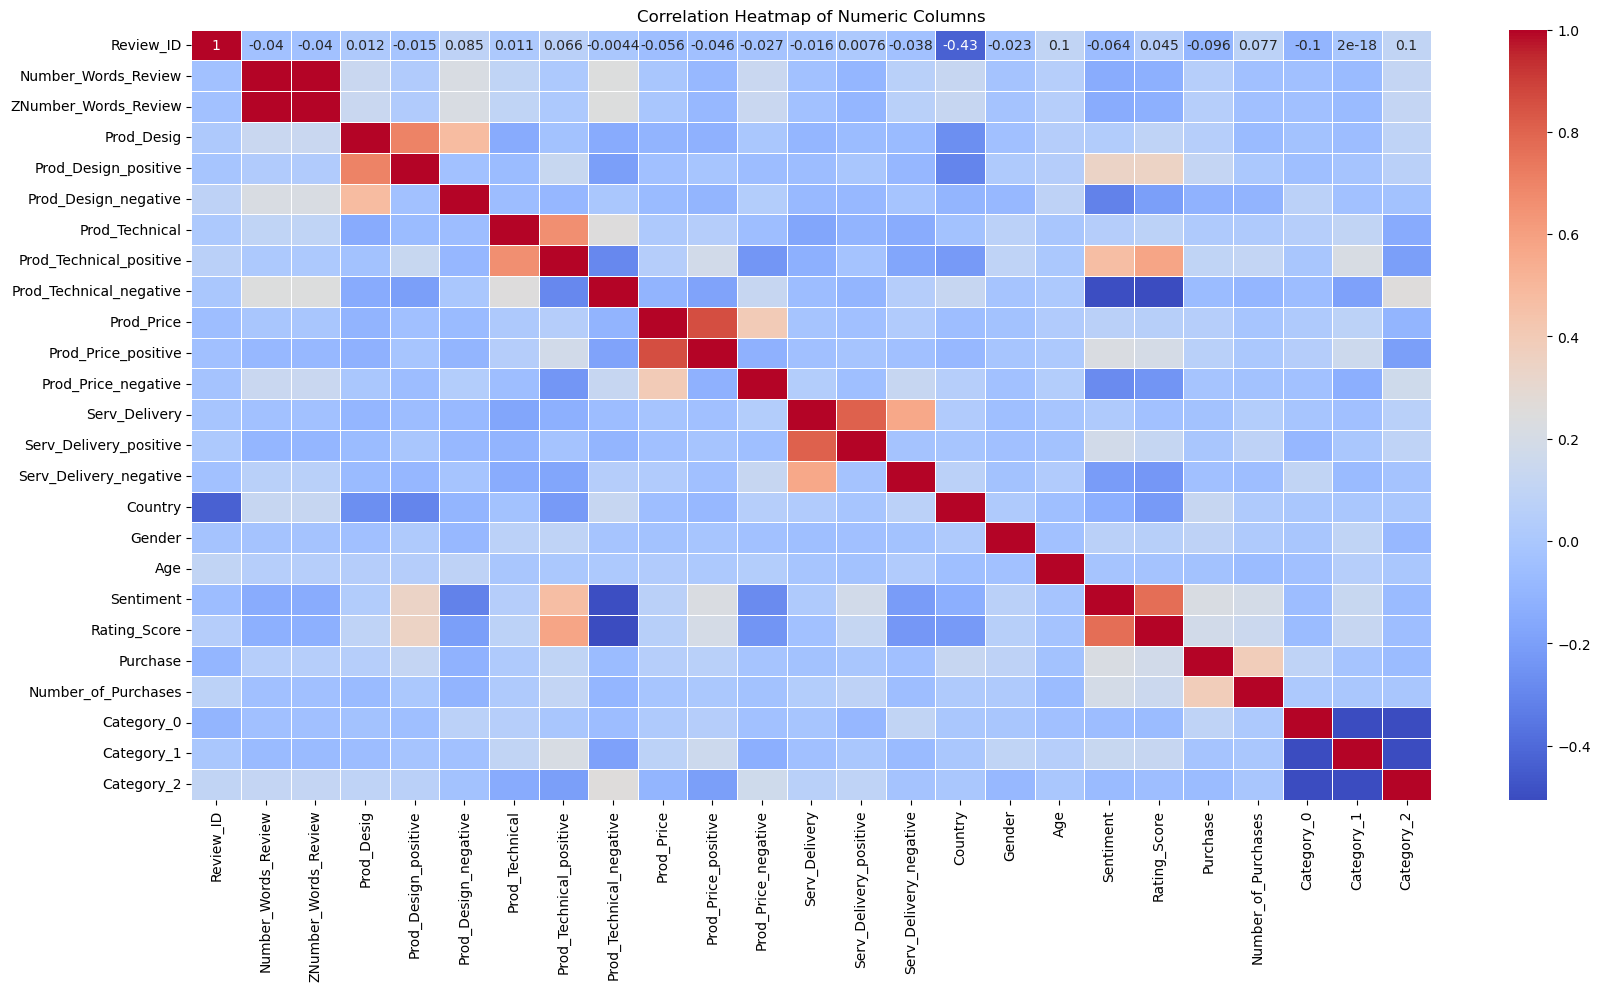

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with both numeric and non-numeric columns
# Here, df.select_dtypes() filters only numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

## Question 1: Linear Regression

Given the nature of the question, a regression model seems appropriate as we are interested in understanding how various factors influence the continuous outcome of rating scores.

In [ ]:

columns_to_drop = ['ZNumber_Words_Review', 'Review_ID', 'Prod_Desig', 'Prod_Design_negative', 'Prod_Technical', 'Prod_Technical_negative', 
                   'Prod_Price', 'Prod_Price_negative', 'Serv_Delivery', 'Serv_Delivery_negative', 'Rating_Score']
X_reg = df.drop(columns_to_drop, axis=1)
y_reg = df['Rating_Score']

For this analysis, I will build a linear regression model to predict Rating_Score using the explanatory variables provided. This model will help us understand which factors are significant in explaining the variation in rating scores and the direction of their impact.

In [ ]:
X_reg = sm.add_constant(X_reg)
model = sm.OLS(y_reg, X_reg).fit()
predictions = model.predict(X_reg)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Rating_Score   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     90.02
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          3.15e-130
Time:                        19:22:12   Log-Likelihood:                -650.42
No. Observations:                 600   AIC:                             1329.
Df Residuals:                     586   BIC:                             1390.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Question 2: Logistic Regression

In [ ]:
target_log = 'Purchase'
# We decided to drop 'Number_of_Purchases' because of reversal causation problems
columns_to_drop_log = ['ZNumber_Words_Review', 'Review_ID', 'Prod_Desig', 'Prod_Design_negative', 'Prod_Technical', 'Prod_Technical_negative', 
                   'Prod_Price', 'Prod_Price_negative', 'Serv_Delivery', 'Serv_Delivery_negative', 'Purchase', 'Number_of_Purchases']
X_log = df.drop(columns_to_drop_log, axis=1)
y_log = df[target_log]

In [ ]:
# Create the Logistic model
logistic_model = sm.Logit(y_log, X_log).fit()

# Model summary
logistic_model_summary = logistic_model.summary()
logistic_model_summary

Optimization terminated successfully.
         Current function value: 0.249444
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Purchase   No. Observations:                  600
Model:                          Logit   Df Residuals:                      587
Method:                           MLE   Df Model:                           12
Date:                Wed, 20 Mar 2024   Pseudo R-squ.:                  0.1958
Time:                        19:22:12   Log-Likelihood:                -149.67
converged:                       True   LL-Null:                       -186.11
Covariance Type:            nonrobust   LLR p-value:                 9.199e-11
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number_Words_Review         0.0067      0.004      1.851      0.064      -0.000       0.014
Prod_Design_positive        0.6742      0.335      2.011      0.044       0.017       1.331
Prod_Technical_positive    -0.0829      0.456     -0.182      0.856      -0.977       0.811
Prod_Price_positive         0.4075      0.353      1.155      0.248      -0.284       1.099
Serv_Delivery_positive     -0.3876      0.800     -0.485      0.628      -1.955       1.180
Country                     1.1232      0.339      3.310      0.001       0.458       1.788
Gender                      0.4288      0.309      1.386      0.166      -0.178       1.035
Age                        -0.0051      0.011     -0.468      0.639      -0.027       0.016
Sentiment                   0.6659      0.246      2.706      0.007       0.184       1.148
Rating_Score                0.8031      0.406      1.976      0.048       0.006       1.600
Category_0                 -9.6853      1.962     -4.937      0.000     -13.530      -5.840
Category_1                -10.4661      1.985     -5.272      0.000     -14.357      -6.575
Category_2                -10.4642      1.992     -5.254      0.000     -14.367      -6.561
===========================================================================================
"""

## Question 3

Given that the dependent variable, the number of total purchases, is a count data, a Poisson regression or a Negative Binomial regression model could be appropriate

Let's Plot the distribution of number of Purchases

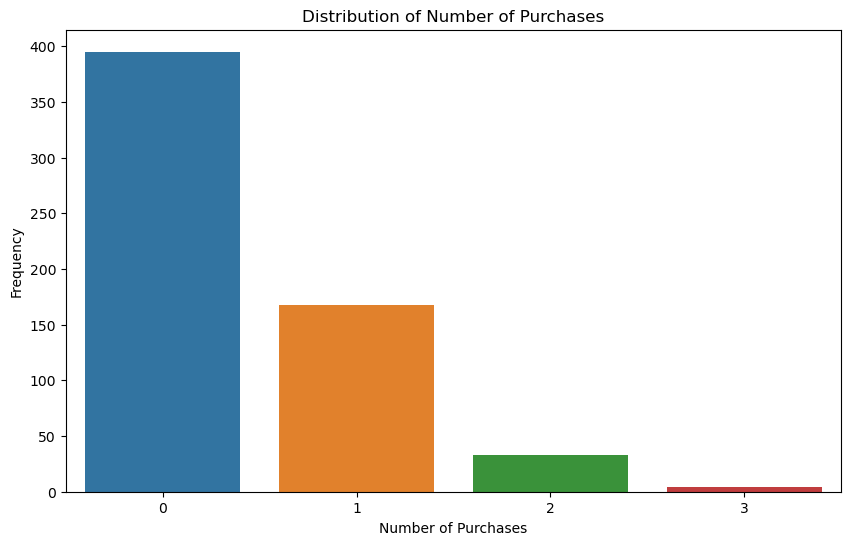

count    600.000000
mean       0.410000
std        0.626542
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Number_of_Purchases, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of Number_of_Purchases
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'Number_of_Purchases')
plt.title('Distribution of Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for Number_of_Purchases
df['Number_of_Purchases'].describe()

In [ ]:

# Preparing data for Poisson regression
columns_to_drop_poisson = ['ZNumber_Words_Review', 'Review_ID', 'Prod_Desig', 'Prod_Design_negative', 'Prod_Technical', 
                           'Prod_Technical_negative', 'Prod_Price', 'Prod_Price_negative', 'Serv_Delivery', 
                           'Serv_Delivery_negative', 'Number_of_Purchases']
X_poisson = df.drop(columns_to_drop_poisson, axis=1)
y_poisson = df['Number_of_Purchases']

# Adding a constant to the model (for intercept)
X_poisson = sm.add_constant(X_poisson)

# Building the Poisson regression model
poisson_model = sm.GLM(y_poisson, X_poisson, family=sm.families.Poisson()).fit()

# Model summary
poisson_model_summary = poisson_model.summary()
poisson_model_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     Number_of_Purchases   No. Observations:                  600
Model:                             GLM   Df Residuals:                      586
Model Family:                  Poisson   Df Model:                           13
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -455.98
Date:                 Wed, 20 Mar 2024   Deviance:                       477.74
Time:                         19:22:13   Pearson chi2:                     565.
No. Iterations:                      5   Pseudo R-squ. (CS):             0.1231
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.0252      0.291     -3.528      0.000      -1.595      -0.456
Number_Words_Review        -0.0018      0.002     -1.027      0.305      -0.005       0.002
Prod_Design_positive       -0.2461      0.141     -1.745      0.081      -0.523       0.030
Prod_Technical_positive     0.1740      0.193      0.901      0.368      -0.205       0.553
Prod_Price_positive        -0.1923      0.164     -1.171      0.242      -0.514       0.130
Serv_Delivery_positive      0.3074      0.270      1.137      0.255      -0.222       0.837
Country                    -0.0719      0.140     -0.514      0.608      -0.346       0.202
Gender                     -0.0777      0.131     -0.593      0.553      -0.335       0.179
Age                        -0.0052      0.005     -1.123      0.261      -0.014       0.004
Sentiment                   0.1628      0.090      1.805      0.071      -0.014       0.339
Rating_Score                0.0033      0.100      0.033      0.974      -0.193       0.199
Purchase                    1.1906      0.161      7.402      0.000       0.875       1.506
Category_0                 -0.3696      0.129     -2.871      0.004      -0.622      -0.117
Category_1                 -0.3571      0.141     -2.537      0.011      -0.633      -0.081
Category_2                 -0.2984      0.134     -2.219      0.026      -0.562      -0.035
===========================================================================================
"""

## Question 4

In [ ]:
import pandas as pd
import statsmodels.api as sm

predictors = [
    'Number_Words_Review', 'Sentiment', 'Prod_Design_positive',
    'Prod_Technical_positive', 'Prod_Price_positive',
    'Serv_Delivery_positive', 'Country', 'Gender', 'Age', 'Category_0', 'Category_1', 'Category_2', 'Purchase']

# Assuming 'data' is your DataFrame and 'Category' has been one-hot encoded
# Let's say 'Category' has been encoded as 'Category_0', 'Category_1', and 'Category_2'

# Create interaction terms for 'Sentiment' and each 'Category' dummy variable
for i in range(3):  # Adjust the range according to the number of categories
    df[f'Sentiment_Category_{i}'] = df['Sentiment'] * df[f'Category_{i}']

# Update predictors list to include the interaction terms
predictors.extend([f'Sentiment_Category_{i}' for i in range(3)])  # Adjust the range as needed

# Prepare the features (X) and target (y) for the regression model
X = df[predictors]
y = df['Rating_Score']

# Add a constant to the features (X)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the summary of the model
model_summary = model.summary()
print(model_summary)



                            OLS Regression Results                            
Dep. Variable:           Rating_Score   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     84.30
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          4.30e-130
Time:                        19:22:13   Log-Likelihood:                -648.39
No. Observations:                 600   AIC:                             1327.
Df Residuals:                     585   BIC:                             1393.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     